# 🌿 🧠 Understanding Neural Networks - Simplified

Welcome to this Simplified guide on neural networks! In this notebook, we'll break down the concepts of neural networks in a simple and clear manner. By the end, you'll have a solid understanding of how neural networks work and how to create one using Python.

Neural networks have practical applications in various fields, including image recognition, natural language processing, and more.


In [1]:
# Imports and Setup
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input, Dropout
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Check TensorFlow version and GPU availability
print("TensorFlow Version:", tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


2024-06-06 12:17:42.906706: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-06 12:17:42.906798: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-06 12:17:43.015397: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


TensorFlow Version: 2.15.0
Num GPUs Available:  2


## What is a Neural Network?

A neural network is a series of algorithms designed to recognize patterns in data. Inspired by the human brain, it consists of layers of interconnected nodes (neurons) that work together to process inputs and produce outputs.

### Key Terms
- **Neuron:** The basic unit of a neural network, similar to a brain cell. A neuron takes input, processes it with weights and biases, and applies an activation function to produce an output.

- **Layer:** A group of neurons. Layers are typically organized into an input layer, one or more hidden layers, and an output layer. Each neuron in one layer connects to neurons in the next layer.

- **Weights and Biases:** Parameters that the network learns during training. Weights adjust the importance of inputs, and biases allow the activation threshold to be shifted, facilitating the learning process.
- **Activation Function:** A function that helps the network learn complex patterns. It introduces non-linearity, enabling the network to model complex relationships.

### Types of Neural Networks
- **Convolutional Neural Networks (CNNs):** Commonly used for image recognition tasks.
- **Recurrent Neural Networks (RNNs):** Useful for sequential data, such as time series or text.


## Building Blocks of Neural Networks

### Neurons
Neurons are the basic units of a neural network that receive input, process it using weights and biases, and pass the result through an activation function to produce an output.

### Layers
1. **Input Layer:** The layer that receives the initial data. It is the first layer of a neural network that directly takes the raw input features.
2. **Hidden Layers:** Intermediate layers where the network learns to detect features. These layers are between the input and output layers where neurons perform computations and feature extraction.
3. **Output Layer:** The final layer that produces the network's output.


### Loading and Preprocessing Data

First, we need to load the MNIST dataset and preprocess it. The MNIST dataset consists of 28x28 grayscale images of handwritten digits (0-9).

Normalization, which scales the pixel values to the range 0-1, is important because it helps in faster convergence during training.


In [2]:
# Loading and Preprocessing Data

# Load the MNIST dataset, which contains 28x28 grayscale images of handwritten digits
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to have values between 0 and 1 by dividing by 255
# This helps in faster convergence during training
x_train, x_test = x_train / 255.0, x_test / 255.0


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Building the Model

Next, we'll build a simple neural network with one hidden layer using TensorFlow and Keras. The model consists of:
1. **Input Layer:** Converts the 28x28 images into a 1D array of 784 values.
2. **Dense Layer (Hidden Layer):** A fully connected layer with 128 neurons and ReLU activation.
3. **Dense Layer (Output Layer):** A fully connected layer with 10 neurons (one for each digit) and softmax activation.

**Note:** The ReLU activation function is chosen for its ability to introduce non-linearity, while softmax is used in the output layer to produce a probability distribution over the classes.


### Activation Functions

Activation functions play a crucial role in neural networks by introducing non-linearity into the model, allowing it to learn and represent complex patterns in the data. Without activation functions, the neural network would simply perform linear transformations, making it unable to handle more complex tasks. Here are some commonly used activation functions and their characteristics:

**1. Sigmoid Activation Function:**
- **Formula:** $ \sigma(x) = \frac{1}{1 + e^{-x}} $
- **Range:** (0, 1)
- **Properties:** 
  - Squashes input values to a range between 0 and 1.
  - Often used in the output layer of binary classification problems.
  - Can cause the vanishing gradient problem during backpropagation due to its derivative being very small for large positive or negative inputs.

**2. Tanh Activation Function:**
- **Formula:** $ \text{tanh}(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}} $
- **Range:** (-1, 1)
- **Properties:**
  - Squashes input values to a range between -1 and 1.
  - Zero-centered, which helps in centering the data and making optimization easier.
  - Also suffers from the vanishing gradient problem, but to a lesser extent than the sigmoid function.

**3. ReLU (Rectified Linear Unit) Activation Function:**
- **Formula:** $ \text{ReLU}(x) = \max(0, x) $
- **Range:** [0, ∞)
- **Properties:**
  - Introduces non-linearity while allowing for faster training and avoiding the vanishing gradient problem.
  - Computationally efficient as it involves simple thresholding at zero.
  - Can suffer from the "dying ReLU" problem, where neurons get stuck at zero and stop learning. Variants like Leaky ReLU and Parametric ReLU address this issue.

**4. Leaky ReLU Activation Function:**
- **Formula:** $ \text{Leaky ReLU}(x) = \max(0.01x, x) $
- **Range:** (-∞, ∞)
- **Properties:**
  - Allows a small, non-zero gradient when the input is negative.
  - Helps mitigate the dying ReLU problem by ensuring that neurons continue to learn even when they receive negative inputs.

**5. Softmax Activation Function:**
- **Formula:** $ \text{Softmax}(x_i) = \frac{e^{x_i}}{\sum_{j} e^{x_j}} $
- **Range:** (0, 1) (for each output neuron, the sum of outputs is 1)
- **Properties:**
  - Converts logits (raw prediction values) into probabilities, making it useful for multi-class classification problems.
  - Ensures that the output probabilities sum up to 1, allowing for interpretation as a probability distribution.

**6. Swish Activation Function:**
- **Formula:** $ \text{Swish}(x) = x \cdot \sigma(x) $
- **Range:** (-∞, ∞)
- **Properties:**
  - Smooth, non-monotonic function that tends to perform better than ReLU on deeper networks.
  - Self-gated, meaning the function can adjust its own behavior based on the input.

### Choosing Activation Functions

The choice of activation function depends on the specific problem and the architecture of the neural network. Here are some guidelines:

- **Hidden Layers:** ReLU and its variants (Leaky ReLU, Parametric ReLU) are popular choices due to their computational efficiency and effectiveness in avoiding the vanishing gradient problem.
- **Output Layer:**
  - **Binary Classification:** Sigmoid function is commonly used to output probabilities between 0 and 1.
  - **Multi-Class Classification:** Softmax function is used to produce a probability distribution over multiple classes.
  - **Regression Tasks:** Linear activation (no activation function) is typically used in the output layer.

Understanding and experimenting with different activation functions can significantly impact the performance of your neural network. It's essential to consider the properties and potential issues of each activation function when designing and training your models.


In [3]:
# Building the Model

# Initialize a Sequential model, which is a linear stack of layers
model = Sequential([
    Input(shape=(28, 28)),         # Input layer, specifying the shape of input data (28x28 pixels)
    Flatten(),                     # Flatten the 28x28 images into a 1D array of 784 values
    Dense(128, activation='relu'), # Hidden layer with 128 neurons and ReLU activation function
    Dropout(0.2),                  # Dropout layer to prevent overfitting, with 20% dropout rate
    Dense(10, activation='softmax')# Output layer with 10 neurons (one for each class) and softmax activation function
])


### Compiling the Model

We need to compile the model by specifying the optimizer, loss function, and metrics. We'll use the Adam optimizer, sparse categorical crossentropy loss function, and accuracy as the evaluation metric.

- **Optimizer (Adam):** Efficient for training deep learning models.
- **Loss Function (Sparse Categorical Crossentropy):** Suitable for multi-class classification.
- **Metrics (Accuracy):** Evaluates the model's performance by calculating the percentage of correctly predicted instances.


In [4]:
# Compiling the Model

# Compile the model by specifying the optimizer, loss function, and metrics
# - optimizer: 'adam' (adaptive moment estimation) for efficient training
# - loss: 'sparse_categorical_crossentropy' for multi-class classification
# - metrics: ['accuracy'] to evaluate the model's performance
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


### Training the Model

Now, we'll train the model using the training data. We'll set the number of epochs to 5 and use 20% of the training data for validation.

An epoch is one complete iteration over the entire training data. Validation data is used to evaluate the model's performance on data it hasn't seen during training, helping to detect overfitting.


In [5]:
# Training the Model

# Train the model with the training data
# - epochs: Number of times the model will iterate over the entire training data
# - validation_split: Fraction of training data to be used as validation data (0.2 means 20%)
history = model.fit(x_train, y_train, epochs=5, validation_split=0.2)


Epoch 1/5
 100/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5612 - loss: 1.4257

I0000 00:00:1717676278.320788      72 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1717676278.335721      72 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1470/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8458 - loss: 0.5264

W0000 00:00:1717676281.119011      71 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8470 - loss: 0.5222 - val_accuracy: 0.9565 - val_loss: 0.1545
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9521 - loss: 0.1649 - val_accuracy: 0.9654 - val_loss: 0.1227
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9648 - loss: 0.1196 - val_accuracy: 0.9722 - val_loss: 0.0939
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9720 - loss: 0.0942 - val_accuracy: 0.9728 - val_loss: 0.0908
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9761 - loss: 0.0786 - val_accuracy: 0.9757 - val_loss: 0.0846


### Evaluating the Model

After training, we can evaluate the model's performance using the test data. We'll measure the test accuracy to see how well the model generalizes to new data.


In [6]:
# Evaluating the Model

# Evaluate the model's performance using the test data
# - verbose=2: Print a summary of the evaluation
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)


W0000 00:00:1717676293.137589      71 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 - 1s - 4ms/step - accuracy: 0.9744 - loss: 0.0824

Test accuracy: 0.974399983882904


### Making Predictions

After evaluating the model, we can use it to make predictions on new data. The model outputs probabilities for each class (0-9), and we use `argmax` to get the index of the highest probability, which corresponds to the predicted class.


In [7]:
# Making Predictions

# Make predictions on the test data
# The model outputs probabilities for each class (0-9)
predictions = model.predict(x_test)

# Display the prediction for the first test image
# - argmax: Get the index of the highest probability, which is the predicted class
print(predictions[0])


132/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

W0000 00:00:1717676294.379557      73 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[6.3246728e-07 6.3269892e-09 1.1171139e-04 1.9406893e-04 2.3061532e-10
 7.7065749e-07 3.4366136e-12 9.9968857e-01 1.4080673e-07 4.0019463e-06]


### Plotting a Test Image and Prediction

We'll plot a test image along with its predicted label to visually inspect the model's prediction.

The image is displayed in grayscale, and the title of the plot shows the predicted label.


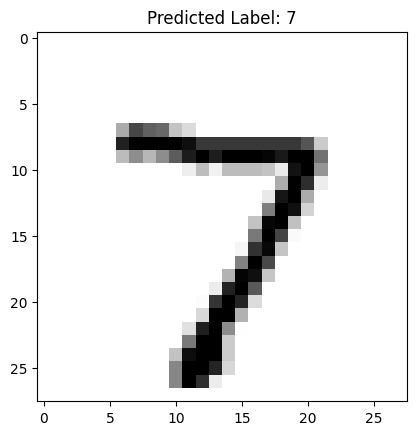

In [8]:
# Plotting a Test Image and Prediction

# Plot the first test image
plt.figure()
plt.imshow(x_test[0], cmap=plt.cm.binary)

# Title the plot with the predicted label
plt.title(f"Predicted Label: {predictions[0].argmax()}")
plt.show()


### Visualizing Training Results

Let's plot the training and validation accuracy and loss over the epochs to see how the model's performance improved during training.

These plots help in understanding the model's learning process and identifying potential issues like overfitting.


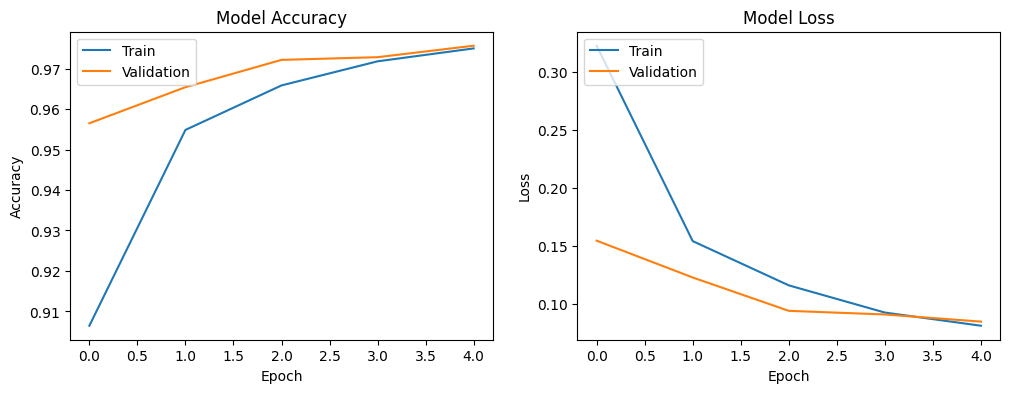

In [9]:
# Visualizing Training Results

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


### Preventing Overfitting

To demonstrate a technique for preventing overfitting, we will add dropout layers to the model. Dropout randomly sets a fraction of input units to 0 at each update during training time, which helps prevent overfitting.

We will rebuild the model with dropout layers and retrain it.


In [10]:
# Rebuilding the Model with Dropout to Prevent Overfitting

# Initialize a Sequential model with dropout layers
model_dropout = Sequential([
    Input(shape=(28, 28)),         # Input layer, specifying the shape of input data (28x28 pixels)
    Flatten(),                     # Flatten the 28x28 images into a 1D array of 784 values
    Dense(128, activation='relu'), # Hidden layer with 128 neurons and ReLU activation function
    Dropout(0.5),                  # Dropout layer to prevent overfitting, with 50% dropout rate
    Dense(10, activation='softmax')# Output layer with 10 neurons (one for each class) and softmax activation function
])

# Compile the model with dropout layers
model_dropout.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

# Train the model with dropout layers
history_dropout = model_dropout.fit(x_train, y_train, epochs=5, validation_split=0.2)

# Evaluate the model with dropout layers
test_loss_dropout, test_acc_dropout = model_dropout.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy with dropout:', test_acc_dropout)


Epoch 1/5
  97/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4694 - loss: 1.6121

W0000 00:00:1717676299.056646      70 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1476/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8024 - loss: 0.6496

W0000 00:00:1717676301.765240      70 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8036 - loss: 0.6459 - val_accuracy: 0.9483 - val_loss: 0.1820
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9274 - loss: 0.2522 - val_accuracy: 0.9614 - val_loss: 0.1369
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9407 - loss: 0.2032 - val_accuracy: 0.9659 - val_loss: 0.1208
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9469 - loss: 0.1804 - val_accuracy: 0.9675 - val_loss: 0.1127
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9527 - loss: 0.1574 - val_accuracy: 0.9697 - val_loss: 0.1083


W0000 00:00:1717676313.695563      71 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 - 1s - 3ms/step - accuracy: 0.9701 - loss: 0.0953

Test accuracy with dropout: 0.9700999855995178


### Common Challenges and Solutions

**1. Overfitting:**
- **Problem:** The model performs well on training data but poorly on unseen test data.
- **Solutions:**
  - **Dropout:** Randomly sets a fraction of the input units to 0 at each update during training to prevent over-reliance on specific neurons.
  - **Regularization:** Adds a penalty to the loss function to limit model complexity. Common techniques include L1 (Lasso) and L2 (Ridge) regularization.
  - **Increase Training Data:** Collect more data or use data augmentation techniques to create variations of existing data, which helps the model generalize better.

**2. Underfitting:**
- **Problem:** The model is too simple to capture the underlying patterns in the data, leading to poor performance on both training and test data.
- **Solutions:**
  - **Increase Model Complexity:** Add more layers or neurons to the network.
  - **Use More Features:** Incorporate additional relevant features into the model.
  - **Train Longer:** Increase the number of epochs or reduce the learning rate to allow the model to learn more effectively.

**3. Vanishing/Exploding Gradients:**
- **Problem:** Gradients become too small (vanishing) or too large (exploding) during backpropagation, causing training to stall or become unstable.
- **Solutions:**
  - **Appropriate Activation Functions:** Use activation functions like ReLU, which mitigate the vanishing gradient problem by allowing gradients to flow through the network.
  - **Proper Initialization:** Use techniques like He initialization for ReLU activations or Xavier initialization for sigmoid/tanh activations to maintain gradient flow.
  - **Gradient Clipping:** Clip gradients during backpropagation to prevent them from becoming too large.

**4. Slow Training:**
- **Problem:** Training a neural network can be time-consuming, especially with large datasets and complex models.
- **Solutions:**
  - **Use GPUs:** Leverage the parallel processing power of GPUs to speed up computations.
  - **Batch Normalization:** Normalize the inputs of each layer to stabilize learning and improve convergence speed.
  - **Efficient Algorithms:** Use optimized algorithms and libraries designed for high-performance deep learning, such as TensorFlow and PyTorch.

**5. Data Imbalance:**
- **Problem:** The training data has an unequal distribution of classes, leading to biased predictions towards the majority class.
- **Solutions:**
  - **Resampling:** Use techniques like oversampling the minority class or undersampling the majority class to balance the dataset.
  - **Class Weights:** Assign higher weights to the minority class in the loss function to give it more importance during training.
  - **Synthetic Data:** Generate synthetic data for the minority class using techniques like SMOTE (Synthetic Minority Over-sampling Technique).

**6. Hyperparameter Tuning:**
- **Problem:** Finding the optimal set of hyperparameters (e.g., learning rate, batch size, number of layers) can be challenging and time-consuming.
- **Solutions:**
  - **Grid Search:** Explore a predefined set of hyperparameter values systematically.
  - **Random Search:** Sample hyperparameter values randomly within specified ranges.
  - **Bayesian Optimization:** Use probabilistic models to find the optimal hyperparameters more efficiently.

**7. Interpretability:**
- **Problem:** Neural networks are often considered "black boxes" due to their complexity, making it difficult to interpret their decisions.
- **Solutions:**
  - **Visualization Tools:** Use tools like TensorBoard to visualize the model’s performance and understand its behavior.
  - **Model-Agnostic Methods:** Apply techniques like SHAP (SHapley Additive exPlanations) and LIME (Local Interpretable Model-agnostic Explanations) to interpret the model’s predictions.
  - **Simpler Models:** When possible, use simpler models like decision trees or linear models, which are inherently more interpretable.

By addressing these common challenges, you can build more robust and effective neural network models.


### Resources for Further Learning

- [Deep Learning by Ian Goodfellow](https://www.deeplearningbook.org/)
- [Neural Networks and Deep Learning by Michael Nielsen](http://neuralnetworksanddeeplearning.com/)
- [TensorFlow Documentation](https://www.tensorflow.org/tutorials)
- [Keras Documentation](https://keras.io/)


### Conclusion

In this notebook, we covered the basics of neural networks, including what they are, their key components, and how they work. We built a simple model to classify handwritten digits from the MNIST dataset, and we discussed common challenges and solutions in neural network training. This notebook serves as an introduction, providing a foundation for further exploration into more advanced topics such as convolutional neural networks (CNNs), recurrent neural networks (RNNs), and deep learning frameworks like TensorFlow and PyTorch.

While this guide covers essential concepts and practical steps, neural networks are a vast field with continuous advancements and complexities. To truly master neural networks, you'll need to dive deeper into specific areas, experiment with different architectures, and stay updated with the latest research.

With this foundation, you're ready to explore more advanced topics and applications. Keep learning, experimenting, and pushing the boundaries of what you can achieve with neural networks.

Happy learning!
